In [ ]:
# Project Goal:
# Predict whether a sale will generate above-median revenue based on customer demographics and product characteristics.
# Dataset link - https://www.kaggle.com/datasets/thedevastator/analyzing-customer-spending-habits-to-improve-sa?resource=download

In [99]:
# pandas is used to load and work with tables of data
import pandas as pd

# train_test_split helps us split data into training and testing sets
from sklearn.model_selection import train_test_split

# LogisticRegression is a simple classification algorithm
from sklearn.linear_model import LogisticRegression

# accuracy_score tells us how often we predicted correctly
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the CSV file into a DataFrame (a table structure)
df = pd.read_csv("/Users/pyr/Desktop/Machine Learning/SalesForCourse_quizz_table.csv")


In [100]:
# Deleting useful columns to keep data tidy (Column1 and index)
df = df.drop(["index", "Column1"], axis=1)

In [10]:
# Inspect data with deleted columns

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  str    
 1   Year              34866 non-null  float64
 2   Month             34866 non-null  str    
 3   Customer Age      34866 non-null  float64
 4   Customer Gender   34866 non-null  str    
 5   Country           34866 non-null  str    
 6   State             34866 non-null  str    
 7   Product Category  34866 non-null  str    
 8   Sub Category      34866 non-null  str    
 9   Quantity          34866 non-null  float64
 10  Unit Cost         34866 non-null  float64
 11  Unit Price        34866 non-null  float64
 12  Cost              34866 non-null  float64
 13  Revenue           34867 non-null  float64
dtypes: float64(7), str(7)
memory usage: 3.7 MB


In [14]:
# Removing empty rows in data (RangeIndex has mismatched number to data)
df = df.dropna()

In [13]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 34866 entries, 0 to 34865
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  str    
 1   Year              34866 non-null  float64
 2   Month             34866 non-null  str    
 3   Customer Age      34866 non-null  float64
 4   Customer Gender   34866 non-null  str    
 5   Country           34866 non-null  str    
 6   State             34866 non-null  str    
 7   Product Category  34866 non-null  str    
 8   Sub Category      34866 non-null  str    
 9   Quantity          34866 non-null  float64
 10  Unit Cost         34866 non-null  float64
 11  Unit Price        34866 non-null  float64
 12  Cost              34866 non-null  float64
 13  Revenue           34866 non-null  float64
dtypes: float64(7), str(7)
memory usage: 3.7 MB


In [15]:
# No missing values, all data is cleaned and ready for next step

In [16]:
# Check if Revenue equals Quantity * Unit Price
check = df["Quantity"] * df["Unit Price"]

difference = (df["Revenue"] - check).abs().sum()

print("Total difference:", difference)

Total difference: 0.0077060000101294435


In [ ]:
# Revenue is simply calculated by multiplication

In [ ]:
# To ensure the model is built to PREDICT revenue, columns QTY, Unit Price, Cost

In [22]:
# Determining High Revenue vs Low Revenue
df["HighRevenue"] = (df["Revenue"] > df["Revenue"].median()).astype(int)

In [ ]:
# Now 1 = sale generated above-median revenue, 0 = below-median revenue

In [24]:
df["HighRevenue"].value_counts()

HighRevenue
0    17447
1    17419
Name: count, dtype: int64

In [ ]:
# The split is almost perfect
# Dataset is not imbalanced

In [ ]:
# Pandas allowed the data to be quickly sorted allowing the median to be found
# Checking if the revenue is above median then convert to 1, else to 0

In [63]:
# To ensure no simple math is used for revenue predictions, certain columns will be opted out
# Using _model to create fresh table with removed columns
df_model = df.drop(["Revenue", "Quantity", "Unit Price", "Cost"], axis=1)

In [64]:
# Display new model
df_model.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Unit Cost,HighRevenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,80.00,0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,24.50,0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.67,0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,87.50,0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,35.00,0


In [65]:
# Removing dates to get rid of unneccessary complexity
df_model = df.drop(["Date"], axis=1)

In [66]:
df_model.head()

,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,HighRevenue
0,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,0
1,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,0
2,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,0
3,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,0
4,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,0


In [67]:
df_model["Country"].nunique()

4

In [68]:
df_model["State"].nunique()

45

In [ ]:
# To begin ML process, data must be encoded accordingly

In [76]:
df_encoded.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Unit Cost,HighRevenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,80.00,0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,24.50,0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.67,0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,87.50,0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,35.00,0


In [ ]:
# Translated key data to numbers and added new columns to allow simplicity when logging T/F

In [80]:
df_encoded = df.drop(["Revenue", "Quantity", "Unit Price", "Cost", "Date"], axis=1)

In [78]:
df_encoded.head()

,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Unit Cost,HighRevenue
0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,80.00,0
1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,24.50,0
2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.67,0
3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,87.50,0
4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,35.00,0


In [81]:
df_encoded = pd.get_dummies(
    df_encoded,
    columns=[
        "Month",
        "Customer Gender",
        "Country",
        "State",
        "Product Category",
        "Sub Category"
    ],
    drop_first=True
)

df_encoded.head()

,Year,Customer Age,Unit Cost,HighRevenue,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,2016.0,29.0,80.00,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2016.0,29.0,24.50,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2016.0,29.0,3.67,0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2016.0,29.0,87.50,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,2016.0,29.0,35.00,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [83]:
# Converting T/F into 0/1's
df_encoded = df_encoded.astype(int)

In [84]:
df_encoded.head()

,Year,Customer Age,Unit Cost,HighRevenue,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,...,Sub Category_Helmets,Sub Category_Hydration Packs,Sub Category_Jerseys,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests
0,2016,29,80,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2016,29,24,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2016,29,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2016,29,87,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2016,29,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [85]:
X = df_encoded.drop("HighRevenue", axis=1)
y = df_encoded["HighRevenue"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (34866, 80)
y shape: (34866,)


In [86]:
# x = columns, y = input
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

X_train: (27892, 80)
X_test: (6974, 80)


In [89]:
# Allowing the system to find relations between the data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9482363062804703


In [ ]:
# Out of ~6,974 test examples, about 94.8% were predicted correctly.

In [ ]:
# Revenue is heavily influenced by product type and cost
# Model is able to separate high ticket items vs low ticket items efficiently

In [ ]:
# Testing new model with unit cost removed to see how much it influenced the accuracy

In [95]:
# 1) Make a new X without Unit Cost
X_no_cost = X.drop("Unit Cost", axis=1)

# 2) Split again (same random_state so it is comparable)
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_cost, y, test_size=0.2, random_state=42
)

# 3) Train model again
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model2 = LogisticRegression(max_iter=5000)
model2.fit(X_train2, y_train2)

# 4) Evaluate
y_pred2 = model2.predict(X_test2)
print("Accuracy without Unit Cost:", accuracy_score(y_test2, y_pred2))

Accuracy without Unit Cost: 0.8445655291081159


Matplotlib is building the font cache; this may take a moment.


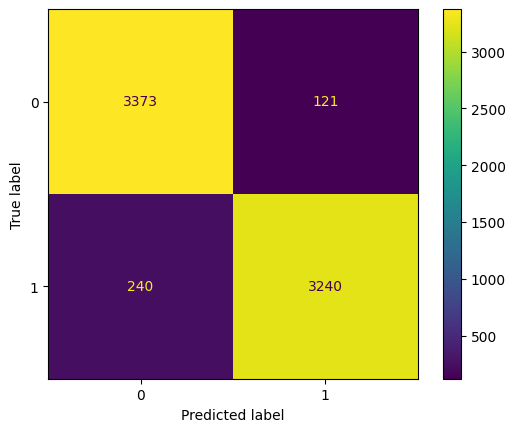

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# From the confusion matrix:
# The model correctly classified 3,373 below-median revenue cases (True Negatives)
# and incorrectly labeled 121 below-median cases as high revenue (False Positives).

# For above-median revenue cases, the model correctly identified 3,240 instances
# (True Positives) and failed to detect 240 cases (False Negatives).

In [102]:
# Which countries generate the most revenue?
df.groupby("Country")["Revenue"].mean().sort_values(ascending=False)

Country
Germany           816.094982
France            666.815789
United Kingdom    665.974147
United States     574.117172
Name: Revenue, dtype: float64

In [103]:
# Which categories drive revenue?
df.groupby("Product Category")["Revenue"].mean()

Product Category
Accessories     329.309665
Bikes          1619.393064
Clothing        656.147547
Name: Revenue, dtype: float64

In [106]:
# Create a DataFrame pairing each feature with its learned coefficient,
# sort them from most positive to most negative impact,
# and display the top 10 most influential features in the model.

import pandas as pd

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients.head(10)

,Feature,Coefficient
62,Product Category_Bikes,2.984490
74,Sub Category_Road Bikes,1.787486
64,Sub Category_Bike Stands,1.593491
79,Sub Category_Vests,1.170046
75,Sub Category_Shorts,1.025349
20,State_Brandenburg,0.984303
73,Sub Category_Mountain Bikes,0.964191
15,Country_Germany,0.890303
72,Sub Category_Jerseys,0.795421
68,Sub Category_Fenders,0.530684


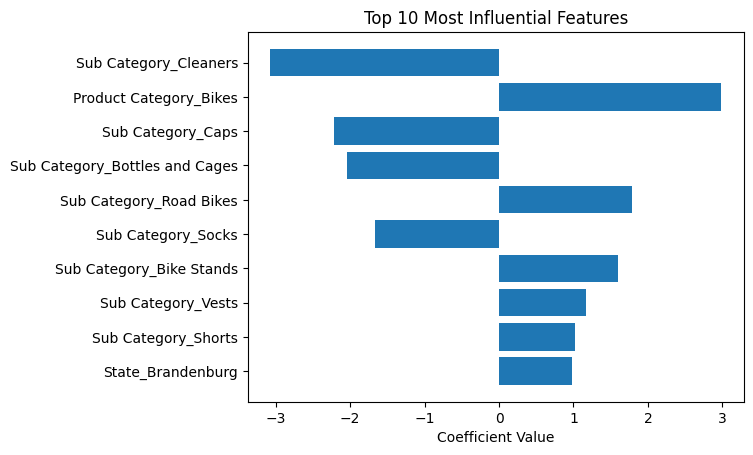

In [108]:
import matplotlib.pyplot as plt

# Create coefficient DataFrame
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

# Get top 10 most important by absolute value
top10 = coefficients.reindex(
    coefficients["Coefficient"].abs().sort_values(ascending=False).index
).head(10)

plt.figure()
plt.barh(top10["Feature"], top10["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Top 10 Most Influential Features")
plt.gca().invert_yaxis()  # Highest at top
plt.show()

In [110]:
# Visualizing the top 10 most influential features in the model based on the absolute value of their coefficients.
# The length of each bar represents the strength of impact, and the direction (positive or negative) shows whether the feature increases or decreases the prediction.